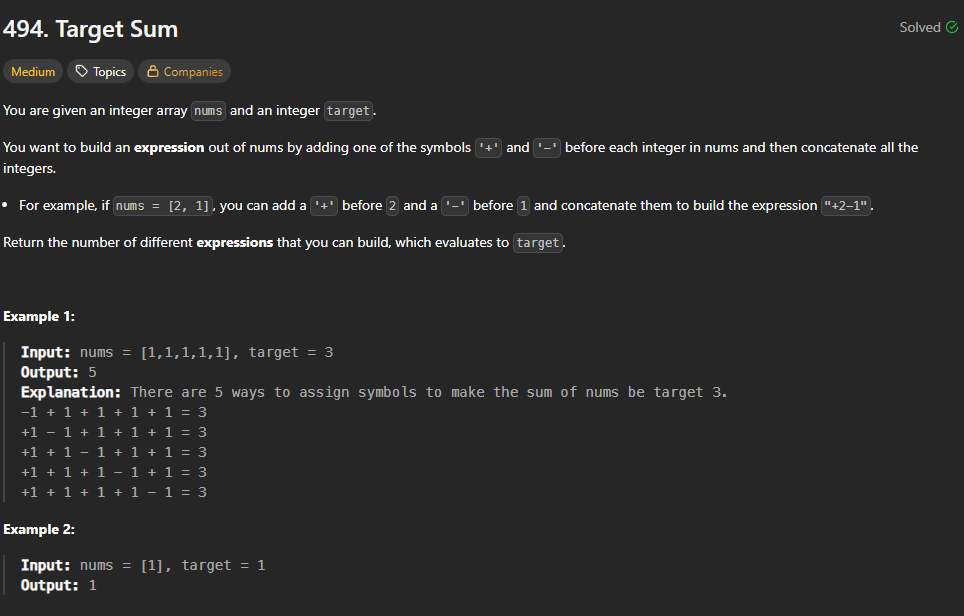

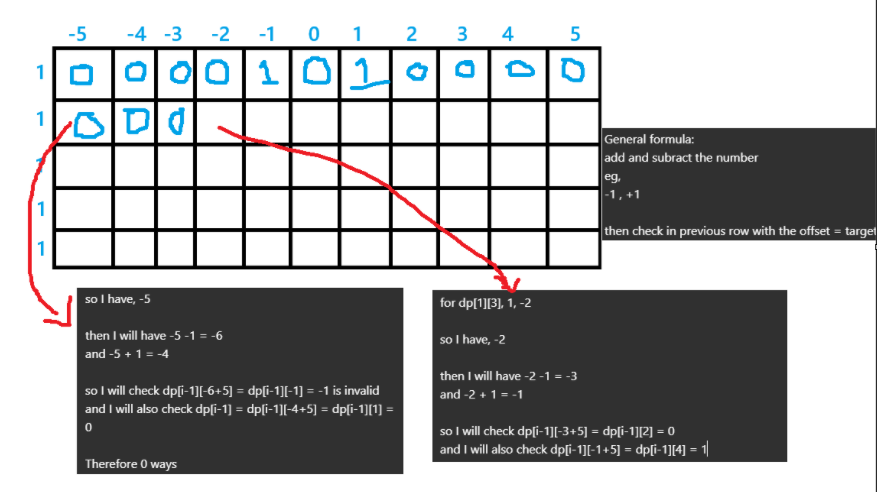

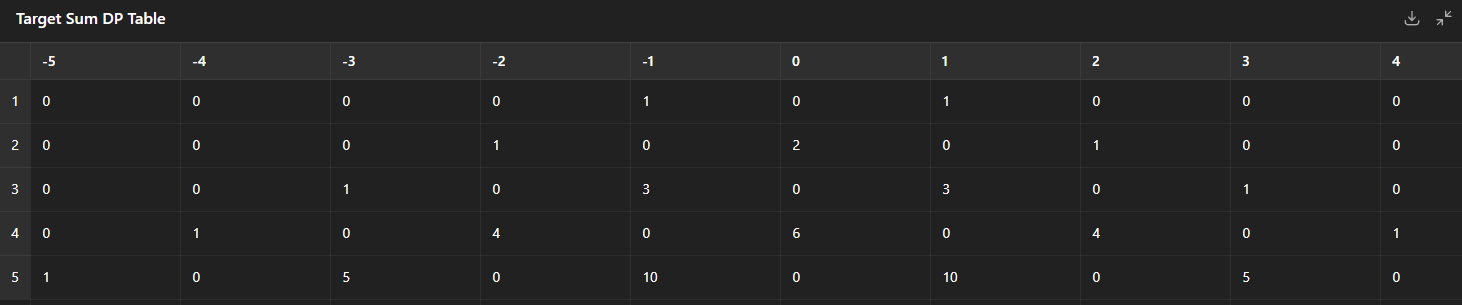

# Dynamic Programming 2D

In [ ]:
from typing import List

class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        total = sum(nums)
        offset = total  # shift negative indices to non-negative
        cols = 2 * total + 1  # possible sum range: -total to +total
        n = len(nums)

        # Edge case: if target is outside possible range
        if abs(target) > total:
            return 0

        # Initialize DP table
        dp = [[0] * cols for _ in range(n)]

        # Base case: first number (handle both +num and -num)
        dp[0][nums[0] + offset] += 1
        dp[0][-nums[0] + offset] += 1

        # Fill DP table
        for i in range(1, n):
            for sum_val in range(-total, total + 1):
                idx = sum_val + offset
                if 0 <= idx < cols:
                    add_idx = sum_val + nums[i] + offset
                    sub_idx = sum_val - nums[i] + offset
                    if 0 <= add_idx < cols:
                        dp[i][idx] += dp[i - 1][add_idx]
                    if 0 <= sub_idx < cols:
                        dp[i][idx] += dp[i - 1][sub_idx]

        return dp[n - 1][target + offset]


# Dynamic Programming 1D

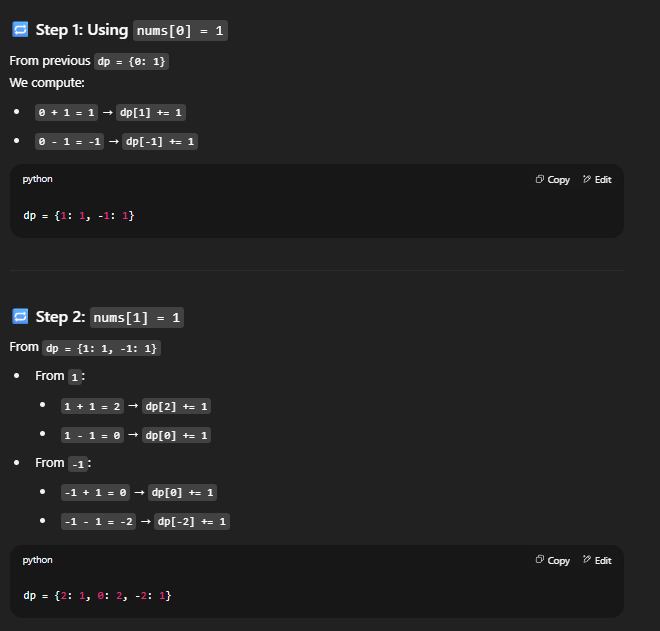

In [ ]:
from collections import defaultdict
from typing import List

class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        dp = defaultdict(int)
        dp[0] = 1  # 1 way to make sum = 0 with 0 elements

        for num in nums:
            next_dp = defaultdict(int)
            for s in dp:
                next_dp[s + num] += dp[s]
                next_dp[s - num] += dp[s]
            dp = next_dp

        return dp[target]


# Recursion

In [ ]:
from typing import List

class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        def helper(i, current_sum):
            # Base case: all numbers used
            if i == len(nums):
                return 1 if current_sum == target else 0
            
            # Choose +nums[i]
            plus = helper(i + 1, current_sum + nums[i])
            # Choose -nums[i]
            minus = helper(i + 1, current_sum - nums[i])
            
            return plus + minus

        return helper(0, 0)

# Memoization

In [ ]:
from typing import List

class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        memo = {}

        def helper(i, current_sum):
            # Check if result is already cached
            if (i, current_sum) in memo:
                return memo[(i, current_sum)]

            # Base case: all numbers used
            if i == len(nums):
                return 1 if current_sum == target else 0

            # Recursive calls: + and -
            plus = helper(i + 1, current_sum + nums[i])
            minus = helper(i + 1, current_sum - nums[i])

            memo[(i, current_sum)] = plus + minus
            return memo[(i, current_sum)]

        return helper(0, 0)